In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
import scipy.special
import random
from astroML.correlation import two_point
plt.style.use('classic')
%matplotlib inline

In [2]:
from mpl_toolkits import mplot3d

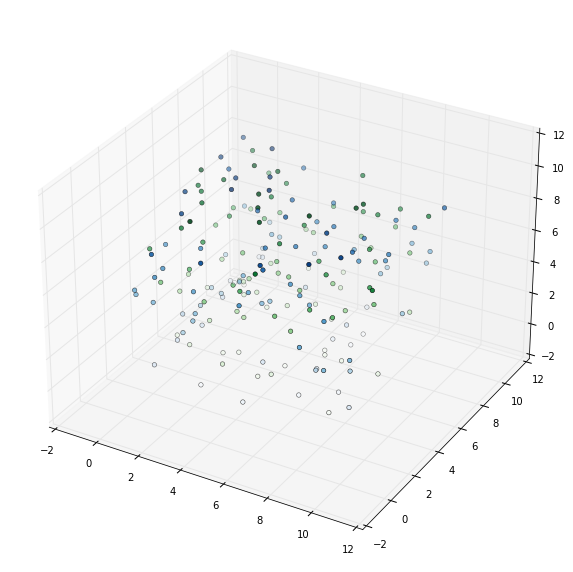

In [3]:
l = 10
puntos = 100

x_1 = np.random.uniform(0, l, puntos)
y_1 = np.random.uniform(0, l, puntos)
z_1 = np.random.uniform(0, l, puntos)

x_2 = np.random.uniform(0, l, puntos)
y_2 = np.random.uniform(0, l, puntos)
z_2 = np.random.uniform(0, l, puntos)

fig = plt.subplots(figsize=(20, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(x_1, y_1, z_1, '.', c = z_1, cmap = 'Greens', linewidth = 0.5)
ax.scatter3D(x_2, y_2, z_2, '.', c = z_2, cmap = 'Blues', linewidth = 0.5);

In [4]:
r = 1
delta_r = 0.15
i = 0
j = 0
k = 0
dd_base = 0
dd = []

for k in range(30):
    for i in range(100):
        x_base = x_1[i]
        y_base = y_1[i]
        z_base = z_1[i]
        for j in range(100):
            x_r = x_1[j]
            y_r = y_1[j]
            z_r = z_1[j]
            r_prueba = np.sqrt((x_base - x_r)**2 + (y_base - y_r)**2 + (z_base - z_r)**2)
            if r < r_prueba < r + delta_r:
                dd_base = dd_base + 1
                j = j + 1
            else:
                j = j + 1
    dd_real = dd_base/2
    dd.append(dd_real)
    dd_base = 0
    r = r + delta_r
    k = k + 1

In [5]:
r = 1
delta_r = 0.15
i = 0
j = 0
k = 0
rr_base = 0
rr = []

for k in range(30):
    for i in range(100):
        x_base = x_2[i]
        y_base = y_2[i]
        z_base = z_2[i]
        for j in range(100):
            x_r = x_2[j]
            y_r = y_2[j]
            z_r = z_2[j]
            r_prueba = np.sqrt((x_base - x_r)**2 + (y_base - y_r)**2 + (z_base - z_r)**2)
            if r < r_prueba < r + delta_r:
                rr_base = rr_base + 1
                j = j + 1
            else:
                j = j + 1
    rr_real = rr_base/2
    rr.append(rr_real)
    rr_base = 0
    r = r + delta_r
    k = k + 1

In [6]:
func_dist = []

for i in range(30):
    func = (dd[i]/rr[i]) - 1
    func_dist.append(func)

func_dist

[0.5,
 0.33333333333333326,
 -0.4285714285714286,
 -0.15384615384615385,
 0.0,
 -0.2592592592592593,
 0.72,
 0.1428571428571428,
 -0.23529411764705888,
 0.0,
 -0.05882352941176472,
 0.5428571428571429,
 -0.0980392156862745,
 0.392156862745098,
 0.4222222222222223,
 0.40740740740740744,
 0.24137931034482762,
 0.3214285714285714,
 0.33333333333333326,
 0.1499999999999999,
 0.6612903225806452,
 0.267605633802817,
 0.5438596491228069,
 0.10000000000000009,
 0.05494505494505497,
 0.46341463414634143,
 0.3902439024390243,
 0.34523809523809534,
 0.3902439024390243,
 0.12903225806451624]

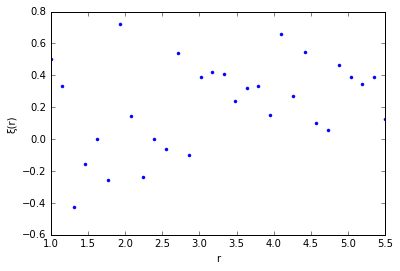

In [7]:
r_aux = np.linspace(1, 5.5, 30)
plt.plot(r_aux, func_dist, ".")
plt.xlabel("r")
plt.ylabel("ξ(r)");

# Prueba 10K

In [8]:
datos_10k = np.load('prueba_10k.npy')

In [9]:
datos_10k

array([[268.935455,  14.330777,  87.841301],
       [ 86.515717, 193.364532, 424.018616],
       [ 75.704872, 393.305695, 412.787201],
       ...,
       [506.397186, 465.760437, 482.190186],
       [ 60.864243, 384.415863, 241.296234],
       [307.20285 ,  12.698746, 119.718018]])

In [10]:
r = 70
delta_r = 10
i = 0
j = 0
k = 0
dd_base = 0
dd = []

for k in range(8):
    for i in range(10000):
        x_base = datos_10k[i, 0]
        y_base = datos_10k[i, 1]
        z_base = datos_10k[i, 2]
        for j in range(10000):
            x_r = datos_10k[j, 0]
            y_r = datos_10k[j, 1]
            z_r = datos_10k[j, 2]
            r_prueba = np.sqrt((x_base - x_r)**2 + (y_base - y_r)**2 + (z_base - z_r)**2)
            if r < r_prueba < r + delta_r:
                dd_base = dd_base + 1
                j = j + 1
            else:
                j = j + 1
    dd_real = dd_base/2
    dd.append(dd_real)
    dd_base = 0
    r = r + delta_r
    k = k + 1

In [11]:
l = 550
puntos = 10000

x_2 = np.random.uniform(0, l, puntos)
y_2 = np.random.uniform(0, l, puntos)
z_2 = np.random.uniform(0, l, puntos)

In [12]:
r = 70
delta_r = 10
i = 0
j = 0
k = 0
rr_base = 0
rr = []

for k in range(8):
    for i in range(10000):
        x_base = x_2[i]
        y_base = y_2[i]
        z_base = z_2[i]
        for j in range(10000):
            x_r = x_2[j]
            y_r = y_2[j]
            z_r = z_2[j]
            r_prueba = np.sqrt((x_base - x_r)**2 + (y_base - y_r)**2 + (z_base - z_r)**2)
            if r < r_prueba < r + delta_r:
                rr_base = rr_base + 1
                j = j + 1
            else:
                j = j + 1
    rr_real = rr_base/2
    rr.append(rr_real)
    rr_base = 0
    r = r + delta_r
    k = k + 1

In [14]:
func_dist = []

for i in range(8):
    func = (dd[i]/rr[i]) - 1
    func_dist.append(func)

func_dist

[0.20243036860783525,
 0.20740239118251447,
 0.1885890917715829,
 0.19008178496664896,
 0.18111935228804033,
 0.17629105055703387,
 0.17345372225547084,
 0.16615780326189844]

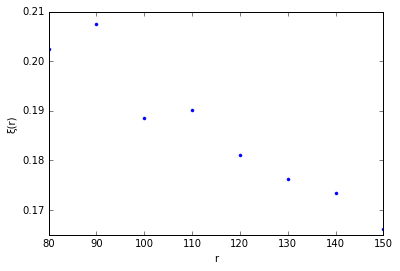

In [16]:
r_aux = np.linspace(80, 150, 8)
plt.plot(r_aux, func_dist, ".")
plt.xlabel("r")
plt.ylabel("ξ(r)");

# Prueba 20k

In [17]:
from astroML.correlation import two_point

In [37]:
datos_20k = np.load('prueba_20k.npy')
r_aux = np.linspace(80, 150, 20)
func_dist = two_point(datos_20k, r_aux)
func_dist

array([ 0.00344477,  0.00109542,  0.00398453,  0.00185642,  0.00445464,
        0.00195845,  0.00444569,  0.0035566 ,  0.00133979,  0.00042249,
       -0.00067793, -0.00123205, -0.00275196, -0.00367924, -0.00233139,
       -0.00309597, -0.00277075, -0.00123387, -0.0043549 ])

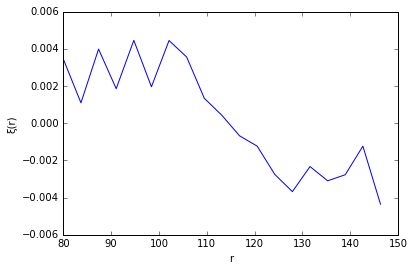

In [38]:
plt.plot(r_aux[:(len(r_aux) - 1)], func_dist)
plt.xlabel("r")
plt.ylabel("ξ(r)");

# Prueba 50k

In [39]:
datos_50k = np.load('prueba_50k.npy')
r_aux = np.linspace(80, 150, 20)
func_dist = two_point(datos_50k, r_aux)
func_dist

array([ 0.00451356,  0.00338448,  0.00297716,  0.00316318,  0.0025366 ,
        0.00111218, -0.00040846,  0.00112656, -0.00015095,  0.00183884,
        0.00033607, -0.00228555, -0.00109211, -0.00174078, -0.00241781,
       -0.00177082, -0.00407474, -0.00351697, -0.00339841])

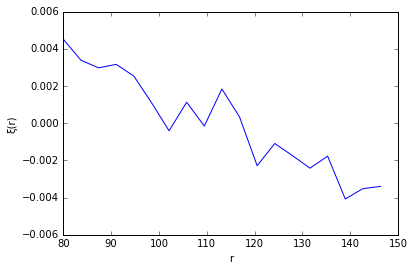

In [40]:
plt.plot(r_aux[:(len(r_aux) - 1)], func_dist)
plt.xlabel("r")
plt.ylabel("ξ(r)");

# Prueba 250k

In [43]:
datos_250k = np.load('prueba_250k.npy')
r_aux = np.linspace(80, 150, 20)
func_dist = two_point(datos_250k, r_aux)
func_dist

array([ 1.08442236e-03,  1.27392336e-03,  1.33921680e-03,  1.37743577e-03,
        1.32953261e-03,  9.43258451e-04,  6.93743733e-04,  8.39715815e-04,
        5.88653225e-05, -8.26072896e-04, -1.21428817e-03, -1.79166905e-03,
       -2.40505929e-03, -2.76855683e-03, -3.15273222e-03, -3.38071515e-03,
       -4.06583104e-03, -4.12067703e-03, -4.71887272e-03])

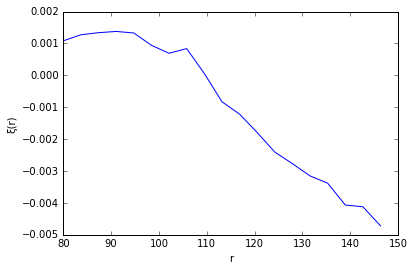

In [44]:
plt.plot(r_aux[:(len(r_aux) - 1)], func_dist)
plt.xlabel("r")
plt.ylabel("ξ(r)");